#**Task-1: To Explore Supervised Machine Learning(Student_scores.csv)**

## Author: Vineet Raj Parashar

## **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Dataset**

*The dataset being used for this example has been made publicly available and can be downloaded from this link: https://drive.google.com/open?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw*

In [ ]:
df = pd.read_csv("/student_scores.csv")

##**Let's explore our dataset a bit**

*Checking first 5 rows of dataset*

In [ ]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


*Shape of dataset*

In [ ]:
df.shape

(25, 2)

*Statistical details of the dataset*

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


*Full summary of the dataframe* 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Check the data for any null values, count the number of null values in each column.

In [ ]:
print("Total number of null values = ",df.isnull().sum().sum())

Total number of null values =  0


## **Visualising the Data**


## Drawing BoxPlot

<Figure size 2000x1000 with 0 Axes>

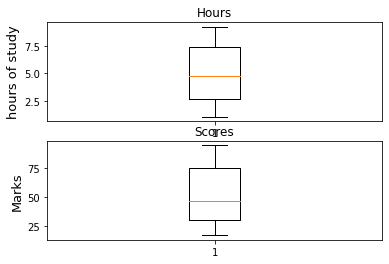

In [ ]:
plt.figure(figsize=(8, 4),dpi=250)
fig, ax = plt.subplots(2,sharey='row')
ax[0].boxplot(df['Hours'])
ax[0].set(title='Hours')
ax[0].set_ylabel('hours of study',fontsize=13)
ax[1].boxplot(df['Scores'])
ax[1].set(title='Scores')
ax[1].set_ylabel('Marks',fontsize=13)
plt.show()

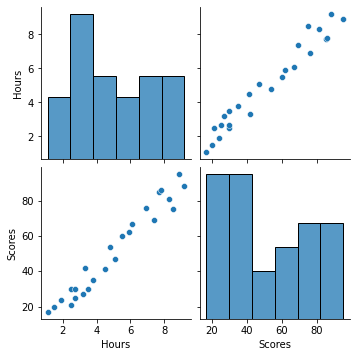

In [ ]:
import seaborn as sns
sns.pairplot(df)

## Correlation between Hours ans Scores


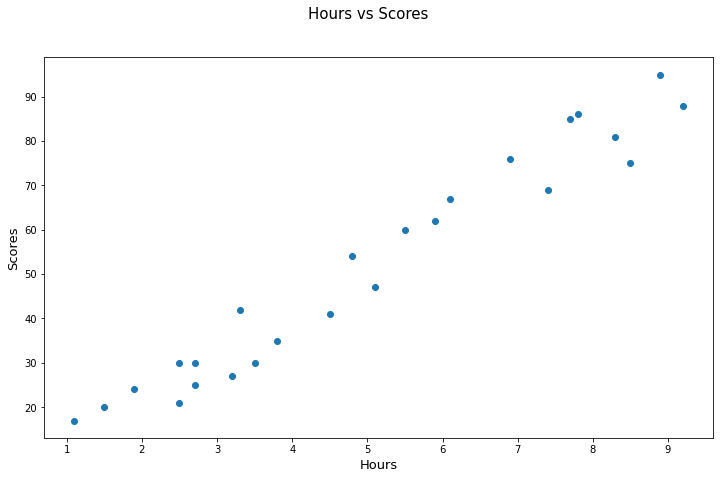

In [ ]:
#Plotting the distribution of scores by scatter plot
fig,ax = plt.subplots(figsize=(12,7))
ax.scatter(df['Hours'],df['Scores'])            
plt.suptitle('Hours vs Scores',fontsize=15) 
ax.set_ylabel('Scores',fontsize=13)
ax.set_xlabel('Hours',fontsize=13)
plt.show()

*From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*

## **Preparing the Data**


In [ ]:
#Divide the data into "attributes" and "labels".
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

### Splitting the dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42,test_size=0.2)

###Training the Algorithm

In [ ]:
#Fit the training dataset
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)      
print("Training successfully completed")

Training successfully completed


In [ ]:
print("Intercept: ",linreg.intercept_)
print("Coefficient of x: ",linreg.coef_)

Intercept:  2.826892353899737
Coefficient of x:  [9.68207815]


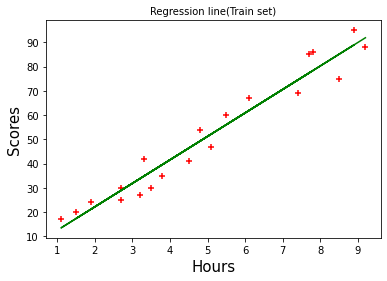

In [ ]:
#plotting the REGRESSION LINE---
Y0 = linreg.intercept_ + linreg.coef_*X_train
#plotting on train data
plt.scatter(X_train,Y_train,color='red',marker='+')
plt.plot(X_train,Y0,color='green')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

## **Comparing Actual vs Predicted Scores**

In [ ]:
#predicting the Scores for test data
Y_pred=linreg.predict(X_test)    
print(Y_pred)
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


,Actual,Result
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


##**Accuracy of the model**

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9678055545167994

## Predicting the score using regression



In [ ]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours in a day :",Prediction_score)

predicted score for a student studying 9.25 hours in a day : [92.38611528]


##**Conlcusion**

## *From the above result we can say that if a student studies 9.25 hours in a day, he will get 92.38 marks.* *italicized text*